<a href="https://colab.research.google.com/github/Dianajoseph4130/Data/blob/master/Copy_of_MoviePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#loading the data set
df = pd.read_csv("/content/cst.csv.csv")
#displaying top 5 data set
df.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,08-02-1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,05-09-1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,01-01-1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [ ]:
import pandas as pd
#loading the data set
df = pd.read_csv("/content/cst.csv.csv")
df.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,08-02-1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,05-09-1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,01-01-1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [ ]:
df.columns

Index(['Rank', 'Release Date', 'Movie Title', 'Production Budget ($)',
       'Worldwide Gross ($)', 'Domestic Gross ($)'],
      dtype='object')

In [ ]:
df["Production Budget ($)"] = df["Production Budget ($)"].str.replace('[\$\,\.]','').astype(int)
df["Worldwide Gross ($)"] = df["Worldwide Gross ($)"].str.replace('[\$\,\.]','').astype(float)
df["Domestic Gross ($)"] = df["Domestic Gross ($)"].str.replace('[\$\,\.]','').astype(float)

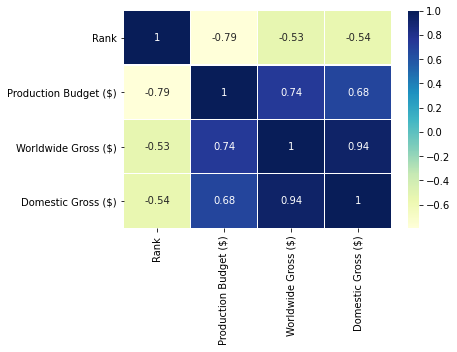

In [ ]:
#Coeeficient of df
import seaborn as sns
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2)

In [ ]:
df.corr
print(df.corr)

<bound method DataFrame.corr of       Rank Release Date  ... Worldwide Gross ($)  Domestic Gross ($)
0     5293   08-02-1915  ...          11000000.0          10000000.0
1     5140   05-09-1916  ...                 0.0                 0.0
2     5230   12/24/1916  ...           8000000.0           8000000.0
3     5299    9/17/1920  ...           3000000.0           3000000.0
4     5222   01-01-1925  ...          22000000.0          11000000.0
...    ...          ...  ...                 ...                 ...
5386  2950   10-08-2018  ...                 0.0                 0.0
5387   126   12/18/2018  ...                 0.0                 0.0
5388    96   12/31/2020  ...                 0.0                 0.0
5389  1119   12/31/2020  ...                 0.0                 0.0
5390  2517   12/31/2020  ...                 0.0                 0.0

[5391 rows x 6 columns]>


In [ ]:
import numpy as np
df['log Production Budget ($)'] = np.log1p(df['Production Budget ($)'])
df['log Worldwide Gross ($)'] = np.log1p(df['Worldwide Gross ($)'])

In [ ]:
df

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($),log Production Budget ($),log Worldwide Gross ($)
0,5293,08-02-1915,The Birth of a Nation,110000,11000000.0,10000000.0,11.608245,16.213406
1,5140,05-09-1916,Intolerance,385907,0.0,0.0,12.863354,0.000000
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000.0,8000000.0,12.206078,15.894952
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000.0,3000000.0,11.512935,14.914123
4,5222,01-01-1925,The Big Parade,245000,22000000.0,11000000.0,12.409018,16.906553
...,...,...,...,...,...,...,...,...
5386,2950,10-08-2018,Meg,15000000,0.0,0.0,16.523561,0.000000
5387,126,12/18/2018,Aquaman,160000000,0.0,0.0,18.890684,0.000000
5388,96,12/31/2020,Singularity,175000000,0.0,0.0,18.980297,0.000000
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0.0,0.0,17.727534,0.000000


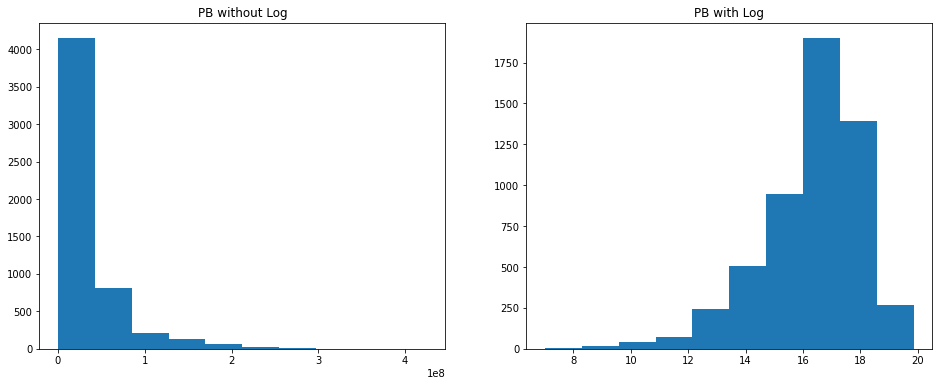

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (16,6))
plt.subplot(1,2,1)
plt.hist(df['Production Budget ($)']);
plt.title('PB without Log');
plt.subplot(1,2,2)
plt.hist(df['log Production Budget ($)']);
plt.title('PB with Log');

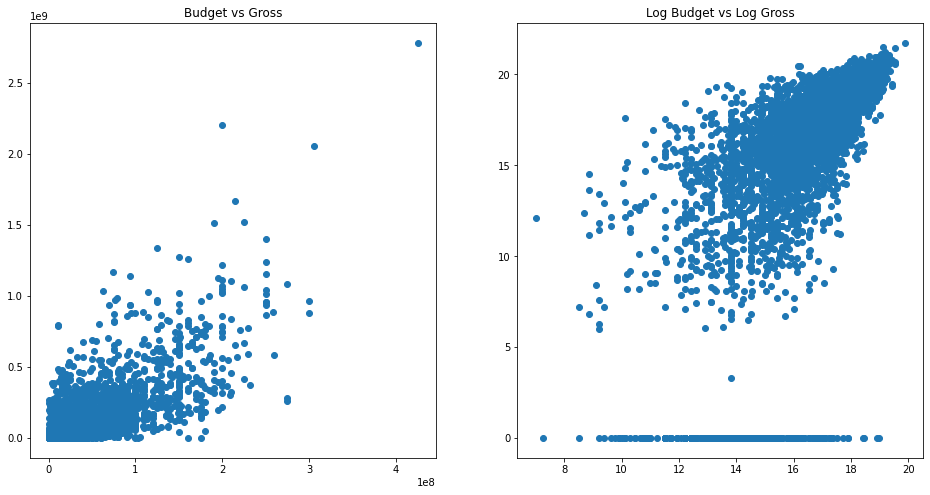

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))
plt.subplot(1,2,1)
plt.scatter(df['Production Budget ($)'], df['Worldwide Gross ($)']);
plt.title('Budget vs Gross');
plt.subplot(1,2,2)
plt.scatter(df['log Production Budget ($)'], df['log Worldwide Gross ($)']);
plt.title('Log Budget vs Log Gross');

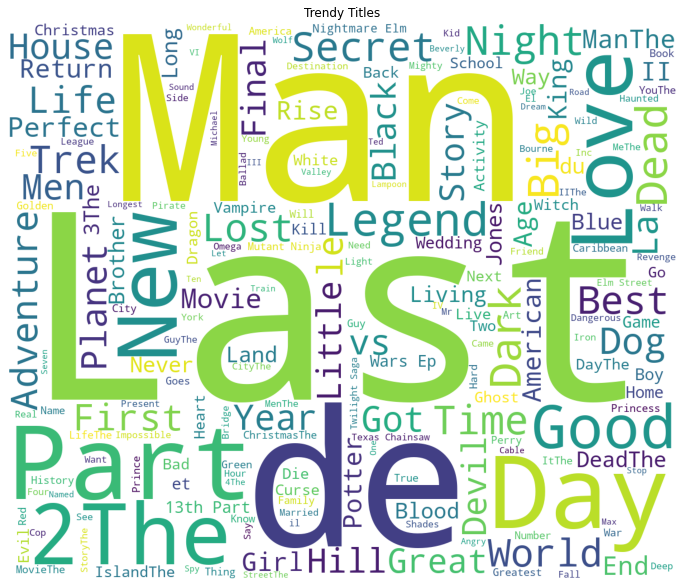

In [ ]:
#Visualization 
#Wordcloud
from wordcloud import WordCloud
plt.figure(figsize = (12, 12))
token_title = ''.join(df['Movie Title'].values)
wordcloud = WordCloud(max_font_size=None, background_color='White', width=1200, height=1000).generate(token_title)
plt.imshow(wordcloud)
plt.title('Trendy Titles')
plt.axis("off")
plt.show()

In [ ]:
#Catplot
df['Release Date'] = pd.to_datetime(format='%Y-%d-%m')
comp = df[['Release Date' , 'Worldwide Gross ($)']]
dataset = sns.load_dataset("comp")
print(comp)
#sns.catplot(x = 'Release Date', y = 'Worldwide Gross'
           # data = comp,
           # kind= 'point'
           # )

TypeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression